In [58]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [59]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [60]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [61]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# DataFrame Description:----->

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

The dataset contains the data of Weather. On the basis of the data the target column is  'Rainfall'and 'RainTomorrow'.......The dataset contain data like 'Date ','','Location','MinTemp','MaxTemp','Evaporation ','Sunshine ','WindGustDir ','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','','Pressure9am','Pressure3pm','Cloud9am' 'Cloud3pm','Temp9am','Temp3pm' and 'RainToday'

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

# Checking null values:

In [62]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

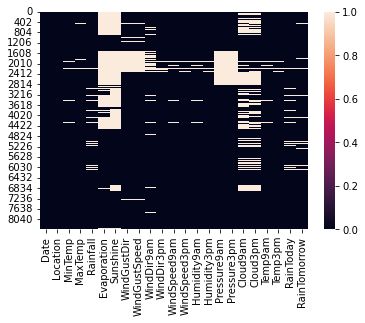

In [63]:
import seaborn as sns
sns.heatmap(df.isnull())

We have seen so many null values are present here

In [64]:
df=df.drop(["Evaporation"],axis=1)

In [65]:
df=df.drop(["Sunshine"],axis=1)

In [66]:
df

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0     2008-12-01   Albury     13.4     22.9       0.6           W   
1     2008-12-02   Albury      7.4     25.1       0.0         WNW   
2     2008-12-03   Albury     12.9     25.7       0.0         WSW   
3     2008-12-04   Albury      9.2     28.0       0.0          NE   
4     2008-12-05   Albury     17.5     32.3       1.0           W   
...          ...      ...      ...      ...       ...         ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0           E   
8421  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
8422  2017-06-23    Uluru      5.4     26.9       0.0           N   
8423  2017-06-24    Uluru      7.8     27.0       0.0          SE   
8424  2017-06-25    Uluru     14.9      NaN       0.0         NaN   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0              44.0          W        WNW          20.0  ...         71.0   
1              44.0        NNW        WSW           4.0  ...         44.0   
2              46.0          W        WSW          19.0  ...         38.0   
3              24.0         SE          E          11.0  ...         45.0   
4              41.0        ENE         NW           7.0  ...         82.0   
...             ...        ...        ...           ...  ...          ...   
8420           31.0         SE        ENE          13.0  ...         51.0   
8421           22.0         SE          N          13.0  ...         56.0   
8422           37.0         SE        WNW           9.0  ...         53.0   
8423           28.0        SSE          N          13.0  ...         51.0   
8424            NaN        ESE        ESE          17.0  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       NaN     16.9   
1            25.0       1010.6       1007.8       NaN       NaN     17.2   
2            30.0       1007.6       1008.7       NaN       2.0     21.0   
3            16.0       1017.6       1012.8       NaN       NaN     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3       NaN       NaN     10.1   
8421         21.0       1023.5       1019.1       NaN       NaN     10.9   
8422         24.0       1021.0       1016.8       NaN       NaN     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   
8424         36.0       1020.2       1017.9       8.0       8.0     15.0   

      Temp3pm  RainToday RainTomorrow  
0        21.8         No           No  
1        24.3         No           No  
2        23.2         No           No  
3        26.5         No           No  
4        29.7         No           No  
...       ...        ...          ...  
8420     22.4         No           No  
8421     24.5         No           No  
8422     26.1         No           No  
8423     26.0         No           No  
8424     20.9         No          NaN  

[8425 rows x 21 columns]

In [67]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['MinTemp']=imp.fit_transform(df['MinTemp'].values.reshape(-1,1))

In [68]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['MaxTemp']=imp.fit_transform(df['MaxTemp'].values.reshape(-1,1))

In [69]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Rainfall']=imp.fit_transform(df['Rainfall'].values.reshape(-1,1))

In [70]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['WindGustDir']=imp.fit_transform(df['WindGustDir'].values.reshape(-1,1))

In [71]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['WindGustSpeed']=imp.fit_transform(df['WindGustSpeed'].values.reshape(-1,1))

In [72]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['WindDir9am']=imp.fit_transform(df['WindDir9am'].values.reshape(-1,1))

In [73]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['WindDir3pm']=imp.fit_transform(df['WindDir3pm'].values.reshape(-1,1))

In [74]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['WindSpeed9am']=imp.fit_transform(df['WindSpeed9am'].values.reshape(-1,1))

In [75]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['WindSpeed3pm']=imp.fit_transform(df['WindSpeed3pm'].values.reshape(-1,1))

In [76]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Humidity9am']=imp.fit_transform(df['Humidity9am'].values.reshape(-1,1))

In [77]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Humidity3pm']=imp.fit_transform(df['Humidity3pm'].values.reshape(-1,1))

In [78]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Pressure9am']=imp.fit_transform(df['Pressure9am'].values.reshape(-1,1))

In [79]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Pressure3pm']=imp.fit_transform(df['Pressure3pm'].values.reshape(-1,1))

In [80]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Cloud9am']=imp.fit_transform(df['Cloud9am'].values.reshape(-1,1))

In [81]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Cloud3pm']=imp.fit_transform(df['Cloud3pm'].values.reshape(-1,1))

In [82]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Temp9am']=imp.fit_transform(df['Temp9am'].values.reshape(-1,1))

In [83]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['Temp3pm']=imp.fit_transform(df['Temp3pm'].values.reshape(-1,1))

In [84]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['RainToday']=imp.fit_transform(df['RainToday'].values.reshape(-1,1))

In [85]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['RainTomorrow']=imp.fit_transform(df['RainTomorrow'].values.reshape(-1,1))

In [86]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

All null values are filled

<AxesSubplot:>

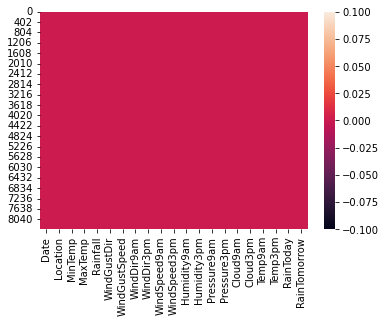

In [87]:
import seaborn as sns
sns.heatmap(df.isnull())

In [88]:
df

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0     2008-12-01   Albury     13.4     22.9       0.6           W   
1     2008-12-02   Albury      7.4     25.1       0.0         WNW   
2     2008-12-03   Albury     12.9     25.7       0.0         WSW   
3     2008-12-04   Albury      9.2     28.0       0.0          NE   
4     2008-12-05   Albury     17.5     32.3       1.0           W   
...          ...      ...      ...      ...       ...         ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0           E   
8421  2017-06-22    Uluru      3.6     25.3       0.0         NNW   
8422  2017-06-23    Uluru      5.4     26.9       0.0           N   
8423  2017-06-24    Uluru      7.8     27.0       0.0          SE   
8424  2017-06-25    Uluru     14.9     19.0       0.0           N   

      WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0              44.0          W        WNW          20.0  ...         71.0   
1              44.0        NNW        WSW           4.0  ...         44.0   
2              46.0          W        WSW          19.0  ...         38.0   
3              24.0         SE          E          11.0  ...         45.0   
4              41.0        ENE         NW           7.0  ...         82.0   
...             ...        ...        ...           ...  ...          ...   
8420           31.0         SE        ENE          13.0  ...         51.0   
8421           22.0         SE          N          13.0  ...         56.0   
8422           37.0         SE        WNW           9.0  ...         53.0   
8423           28.0        SSE          N          13.0  ...         51.0   
8424           39.0        ESE        ESE          17.0  ...         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       7.0     16.9   
1            25.0       1010.6       1007.8       7.0       7.0     17.2   
2            30.0       1007.6       1008.7       7.0       2.0     21.0   
3            16.0       1017.6       1012.8       7.0       7.0     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3       7.0       7.0     10.1   
8421         21.0       1023.5       1019.1       7.0       7.0     10.9   
8422         24.0       1021.0       1016.8       7.0       7.0     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   
8424         36.0       1020.2       1017.9       8.0       8.0     15.0   

      Temp3pm  RainToday RainTomorrow  
0        21.8         No           No  
1        24.3         No           No  
2        23.2         No           No  
3        26.5         No           No  
4        29.7         No           No  
...       ...        ...          ...  
8420     22.4         No           No  
8421     24.5         No           No  
8422     26.1         No           No  
8423     26.0         No           No  
8424     20.9         No           No  

[8425 rows x 21 columns]

In [89]:
df=df.drop(["Date"],axis=1)

In [90]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [91]:
df["RainTomorrow"]=Le.fit_transform(df["RainTomorrow"])

In [92]:
Le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [93]:
df["RainTomorrow"].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

In [94]:
df["RainToday"]=Le.fit_transform(df["RainToday"])

In [95]:
Le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

In [96]:
df["RainToday"].value_counts()

0    6435
1    1990
Name: RainToday, dtype: int64

# EDA

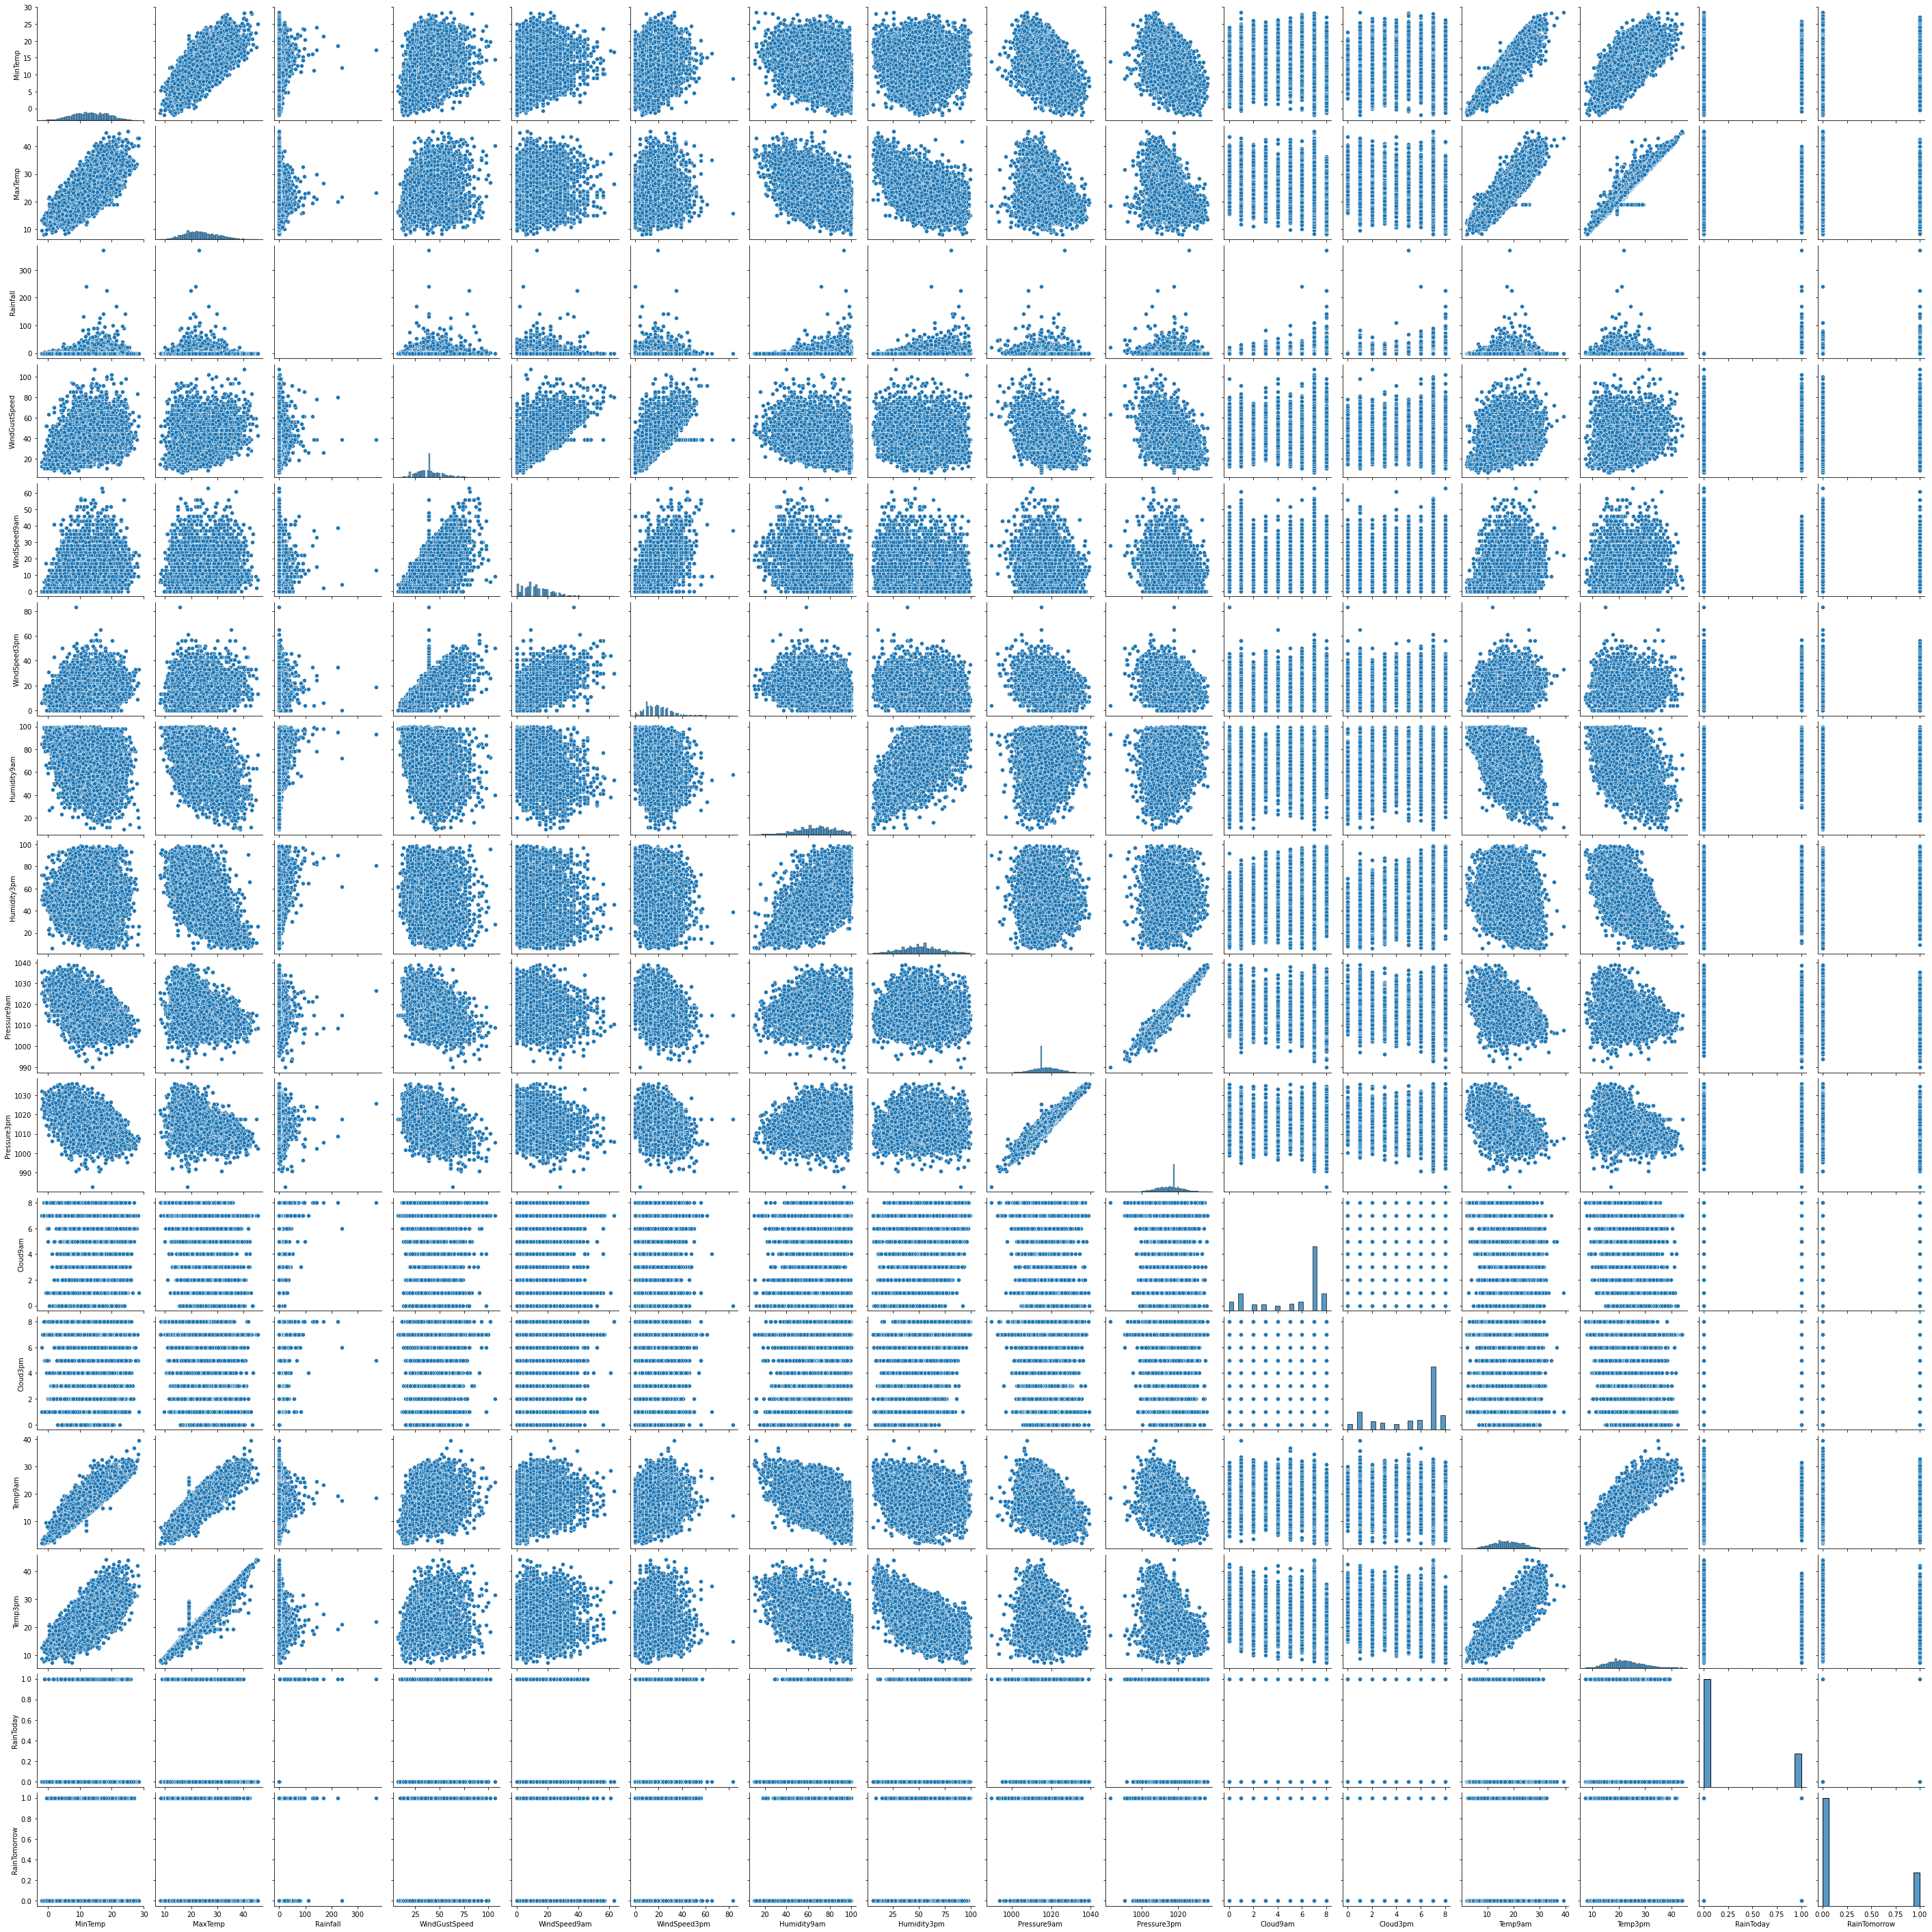

In [97]:
 sns.pairplot(df)

# Count plot

In [98]:
df_visualization_nominal=df[['Location','MinTemp','MaxTemp','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


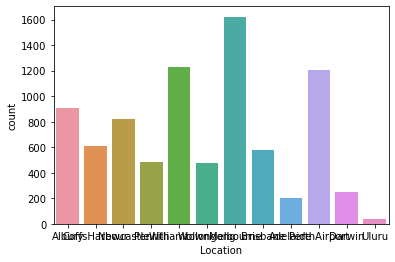

In [99]:
a=sns.countplot(x='Location',data=df_visualization_nominal)
print(df_visualization_nominal['Location'].value_counts())

observation: here Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39

N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219
Name: WindGustDir, dtype: int64


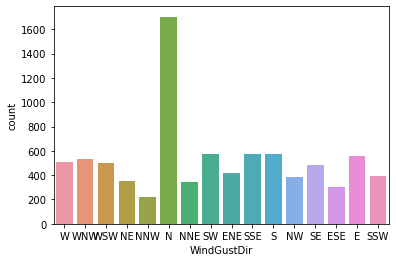

In [100]:
a=sns.countplot(x='WindGustDir',data=df_visualization_nominal)
print(df_visualization_nominal['WindGustDir'].value_counts())

observation: here N      1704
SSE     578
S       577
SW      572
E       557
WNW     531
W       507
WSW     504
SE      484
ENE     415
SSW     396
NW      383
NE      353
NNE     343
ESE     302
NNW     219

N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253
Name: WindDir9am, dtype: int64


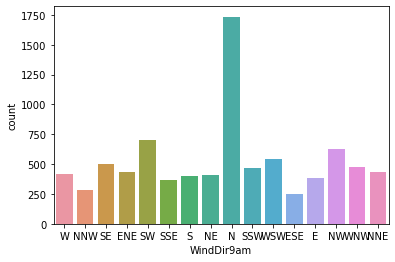

In [101]:
a=sns.countplot(x='WindDir9am',data=df_visualization_nominal)
print(df_visualization_nominal['WindDir9am'].value_counts())

observation: here N      1735
SW      704
NW      625
WSW     543
SE      505
WNW     480
SSW     467
ENE     433
NNE     430
W       414
NE      409
S       402
E       380
SSE     365
NNW     280
ESE     253

SE     1121
S       742
SSE     623
WSW     580
NE      544
N       524
SW      494
WNW     487
NW      468
W       462
ESE     462
E       460
ENE     417
SSW     370
NNE     365
NNW     306
Name: WindDir3pm, dtype: int64


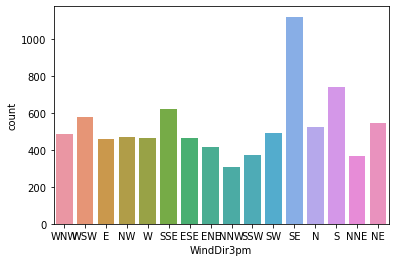

In [102]:
a=sns.countplot(x='WindDir3pm',data=df_visualization_nominal)
print(df_visualization_nominal['WindDir3pm'].value_counts())

9.0     879
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64


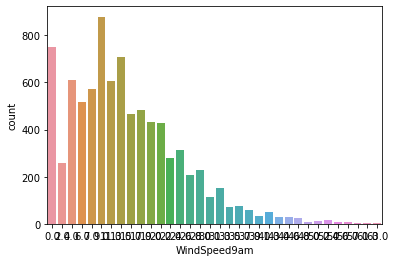

In [103]:
a=sns.countplot(x='WindSpeed9am',data=df_visualization_nominal)
print(df_visualization_nominal['WindSpeed9am'].value_counts())

observation: here 9.0     879
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2

9.0     831
19.0    639
13.0    599
20.0    594
17.0    555
11.0    534
15.0    524
24.0    511
28.0    458
22.0    457
26.0    378
7.0     331
4.0     287
30.0    279
31.0    266
6.0     240
0.0     199
33.0    170
35.0    137
37.0    125
39.0     80
2.0      58
41.0     45
43.0     34
46.0     29
44.0     18
50.0     12
48.0     11
52.0      9
56.0      7
54.0      2
61.0      2
57.0      2
65.0      1
83.0      1
Name: WindSpeed3pm, dtype: int64


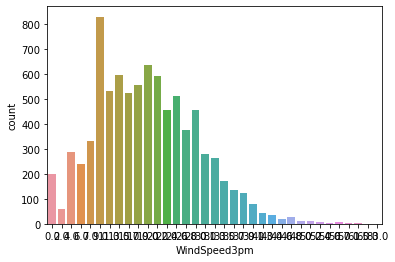

In [104]:
a=sns.countplot(x='WindSpeed3pm',data=df_visualization_nominal)
print(df_visualization_nominal['WindSpeed3pm'].value_counts())

73.0    264
62.0    202
68.0    199
74.0    195
70.0    188
       ... 
17.0      2
14.0      2
11.0      2
10.0      1
15.0      1
Name: Humidity9am, Length: 90, dtype: int64


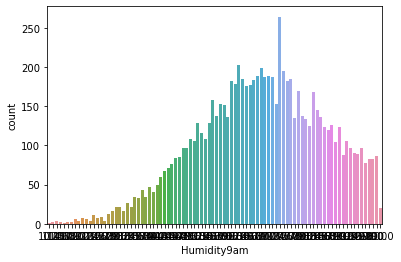

In [105]:
a=sns.countplot(x='Humidity9am',data=df_visualization_nominal)
print(df_visualization_nominal['Humidity9am'].value_counts())

55.0    297
48.0    194
51.0    194
46.0    193
54.0    193
       ... 
8.0      11
7.0       9
98.0      7
99.0      3
6.0       3
Name: Humidity3pm, Length: 94, dtype: int64


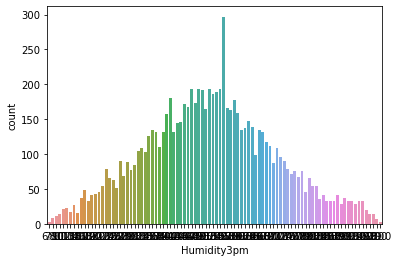

In [106]:
a=sns.countplot(x='Humidity3pm',data=df_visualization_nominal)
print(df_visualization_nominal['Humidity3pm'].value_counts())

1014.8    1367
1019.2      55
1016.1      54
1019.6      53
1020.0      49
          ... 
1037.3       1
997.8        1
1036.9       1
1036.3       1
1033.6       1
Name: Pressure9am, Length: 384, dtype: int64


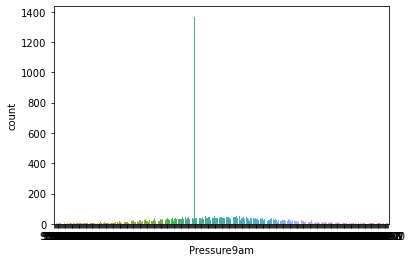

In [107]:
a=sns.countplot(x='Pressure9am',data=df_visualization_nominal)
print(df_visualization_nominal['Pressure9am'].value_counts())

1017.8    1372
1018.0      57
1019.8      53
1017.9      53
1015.5      52
          ... 
982.9        1
994.3        1
998.9        1
1030.0       1
1029.5       1
Name: Pressure3pm, Length: 374, dtype: int64


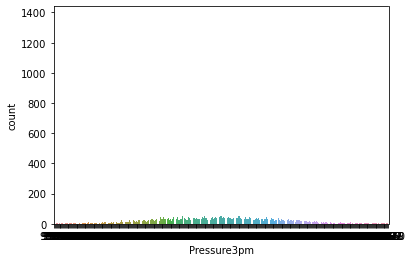

In [108]:
a=sns.countplot(x='Pressure3pm',data=df_visualization_nominal)
print(df_visualization_nominal['Pressure3pm'].value_counts())

7.0    3839
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273
Name: Cloud9am, dtype: int64


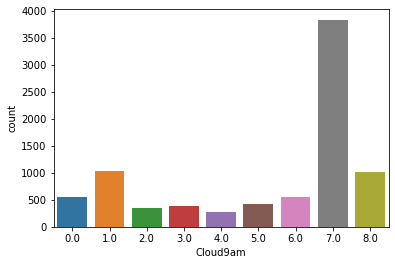

In [109]:
a=sns.countplot(x='Cloud9am',data=df_visualization_nominal)
print(df_visualization_nominal['Cloud9am'].value_counts())

observation: here 7.0    3839
1.0    1038
8.0    1015
0.0     554
6.0     551
5.0     414
3.0     384
2.0     357
4.0     273

7.0    3749
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347
Name: Cloud3pm, dtype: int64


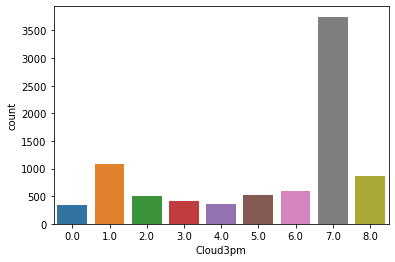

In [110]:
a=sns.countplot(x='Cloud3pm',data=df_visualization_nominal)
print(df_visualization_nominal['Cloud3pm'].value_counts())

observation: here 7 .0    3749
1.0    1077
8.0     863
6.0     597
5.0     522
2.0     508
3.0     411
4.0     351
0.0     347

14.8    133
18.0     73
18.3     71
17.5     69
20.6     68
       ... 
2.5       1
2.0       1
3.4       1
5.2       1
30.2      1
Name: Temp9am, Length: 304, dtype: int64


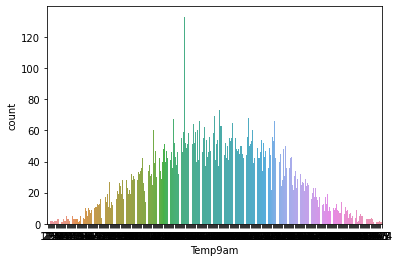

In [111]:
a=sns.countplot(x='Temp9am',data=df_visualization_nominal)
print(df_visualization_nominal['Temp9am'].value_counts())

19.2    174
22.5     77
19.0     75
21.7     72
18.5     72
       ... 
37.4      1
8.7       1
36.7      1
8.6       1
42.4      1
Name: Temp3pm, Length: 328, dtype: int64


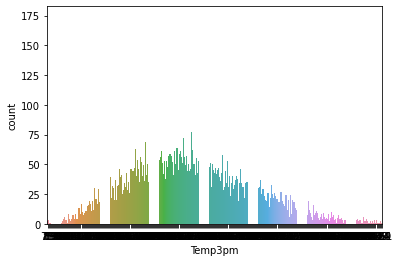

In [112]:
a=sns.countplot(x='Temp3pm',data=df_visualization_nominal)
print(df_visualization_nominal['Temp3pm'].value_counts())

0    6435
1    1990
Name: RainToday, dtype: int64


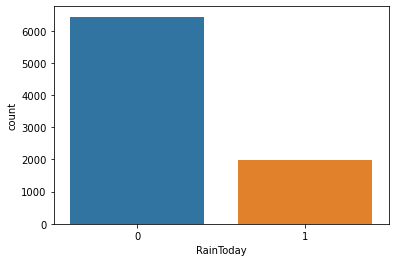

In [113]:
a=sns.countplot(x='RainToday',data=df_visualization_nominal)
print(df_visualization_nominal['RainToday'].value_counts())

observation: rain today yes 6435 no 1990

# Checking the disttribution of the continous value of the float type columns...

In [114]:
df_visualization_continous=df[["MinTemp","MaxTemp","Rainfall","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm"]].copy()

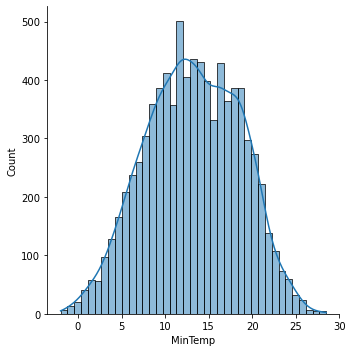

In [115]:
sns.displot(df_visualization_continous["MinTemp"],kde=True)

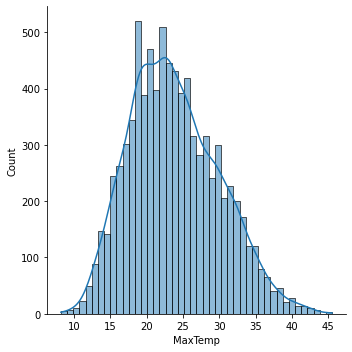

In [116]:
sns.displot(df_visualization_continous["MaxTemp"],kde=True)

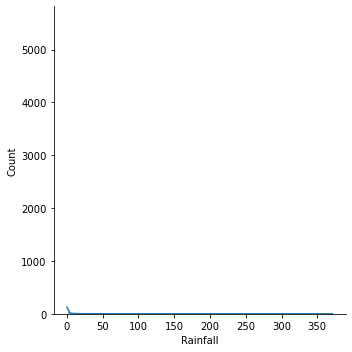

In [117]:
sns.displot(df_visualization_continous["Rainfall"],kde=True)

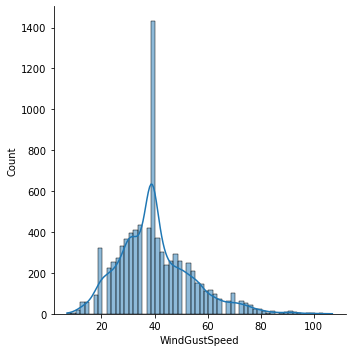

In [118]:
sns.displot(df_visualization_continous["WindGustSpeed"],kde=True)

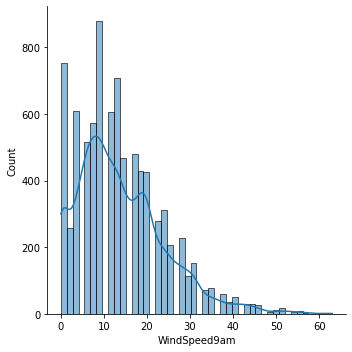

In [119]:
sns.displot(df_visualization_continous["WindSpeed9am"],kde=True)

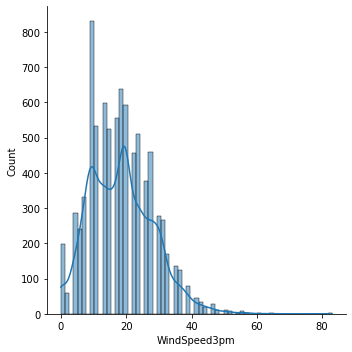

In [120]:
sns.displot(df_visualization_continous["WindSpeed3pm"],kde=True)

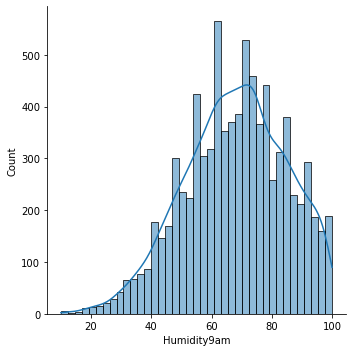

In [121]:
sns.displot(df_visualization_continous["Humidity9am"],kde=True)

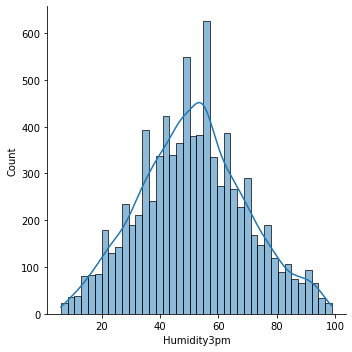

In [122]:
sns.displot(df_visualization_continous["Humidity3pm"],kde=True)

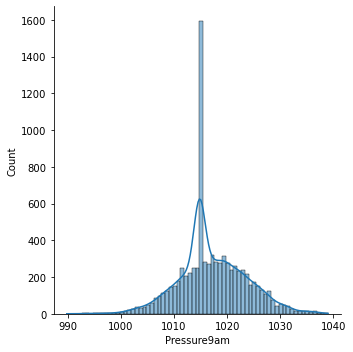

In [123]:
sns.displot(df_visualization_continous["Pressure9am"],kde=True)

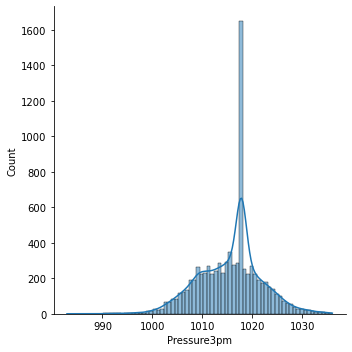

In [124]:
sns.displot(df_visualization_continous["Pressure3pm"],kde=True)

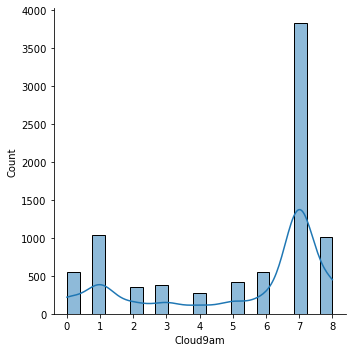

In [125]:
sns.displot(df_visualization_continous["Cloud9am"],kde=True)

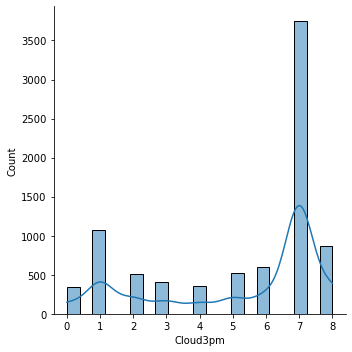

In [126]:
sns.displot(df_visualization_continous["Cloud3pm"],kde=True)

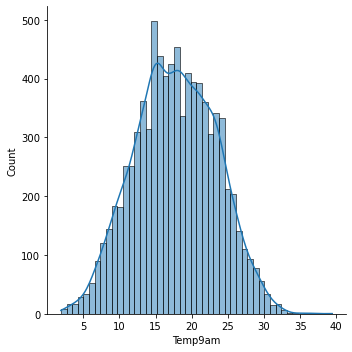

In [127]:
sns.displot(df_visualization_continous["Temp9am"],kde=True)

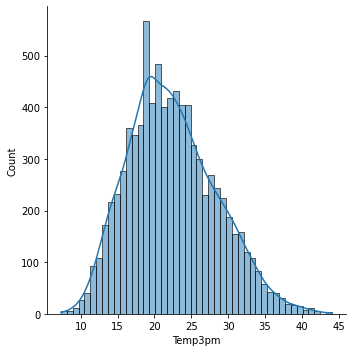

In [128]:
sns.displot(df_visualization_continous["Temp3pm"],kde=True)

data has normally distributed and some skewness is present

# Hist Plot

<AxesSubplot:ylabel='Frequency'>

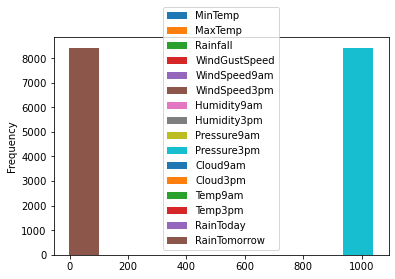

In [129]:
df.plot(kind="hist")

# Correlation

In [130]:
df.corr()

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.716554  0.085226       0.230313      0.136791   
MaxTemp        0.716554  1.000000 -0.086542       0.139978      0.015776   
Rainfall       0.085226 -0.086542  1.000000       0.082628      0.048278   
WindGustSpeed  0.230313  0.139978  0.082628       1.000000      0.605502   
WindSpeed9am   0.136791  0.015776  0.048278       0.605502      1.000000   
WindSpeed3pm   0.181814  0.092107  0.022739       0.636197      0.563132   
Humidity9am   -0.131170 -0.391472  0.227291      -0.271896     -0.358959   
Humidity3pm    0.077566 -0.422893  0.234625      -0.093647     -0.111892   
Pressure9am   -0.411773 -0.315410 -0.069093      -0.382116     -0.113971   
Pressure3pm   -0.428689 -0.402141 -0.030634      -0.385564     -0.186810   
Cloud9am       0.016539 -0.242281  0.133553      -0.004122     -0.034985   
Cloud3pm      -0.038681 -0.242989  0.101161       0.031616      0.003334   
Temp9am        0.886777  0.864741 -0.007002       0.202291      0.110317   
Temp3pm        0.687180  0.973412 -0.089931       0.102218      0.000105   
RainToday      0.065191 -0.222793  0.464941       0.076890      0.035755   
RainTomorrow   0.092657 -0.150733  0.219015       0.190274      0.067943   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.181814    -0.131170     0.077566    -0.411773   
MaxTemp            0.092107    -0.391472    -0.422893    -0.315410   
Rainfall           0.022739     0.227291     0.234625    -0.069093   
WindGustSpeed      0.636197    -0.271896    -0.093647    -0.382116   
WindSpeed9am       0.563132    -0.358959    -0.111892    -0.113971   
WindSpeed3pm       1.000000    -0.251335    -0.091665    -0.195965   
Humidity9am       -0.251335     1.000000     0.633913     0.116224   
Humidity3pm       -0.091665     0.633913     1.000000    -0.002474   
Pressure9am       -0.195965     0.116224    -0.002474     1.000000   
Pressure3pm       -0.246715     0.192752     0.073033     0.914453   
Cloud9am          -0.017971     0.348001     0.314862    -0.054625   
Cloud3pm          -0.028342     0.264800     0.319006    -0.065111   
Temp9am            0.187505    -0.378946    -0.132231    -0.390807   
Temp3pm            0.070000    -0.383237    -0.491816    -0.274830   
RainToday          0.016343     0.373285     0.358895    -0.104011   
RainTomorrow       0.055508     0.271396     0.444347    -0.162406   

               Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
MinTemp          -0.428689  0.016539 -0.038681  0.886777  0.687180   0.065191   
MaxTemp          -0.402141 -0.242281 -0.242989  0.864741  0.973412  -0.222793   
Rainfall         -0.030634  0.133553  0.101161 -0.007002 -0.089931   0.464941   
WindGustSpeed    -0.385564 -0.004122  0.031616  0.202291  0.102218   0.076890   
WindSpeed9am     -0.186810 -0.034985  0.003334  0.110317  0.000105   0.035755   
WindSpeed3pm     -0.246715 -0.017971 -0.028342  0.187505  0.070000   0.016343   
Humidity9am       0.192752  0.348001  0.264800 -0.378946 -0.383237   0.373285   
Humidity3pm       0.073033  0.314862  0.319006 -0.132231 -0.491816   0.358895   
Pressure9am       0.914453 -0.054625 -0.065111 -0.390807 -0.274830  -0.104011   
Pressure3pm       1.000000 -0.005271 -0.005400 -0.446055 -0.368875  -0.032702   
Cloud9am         -0.005271  1.000000  0.624030 -0.184999 -0.250743   0.204414   
Cloud3pm         -0.005400  0.624030  1.000000 -0.187202 -0.273128   0.170005   
Temp9am          -0.446055 -0.184999 -0.187202  1.000000  0.835241  -0.096325   
Temp3pm          -0.368875 -0.250743 -0.273128  0.835241  1.000000  -0.233437   
RainToday        -0.032702  0.204414  0.170005 -0.096325 -0.233437   1.000000   
RainTomorrow     -0.133191  0.216294  0.261159 -0.023597 -0.192463   0.312929   

               RainTomorrow  
MinTemp            0.092657  
MaxTemp           -0.150733  
Rainfall           0.219015  
WindGustSpeed      0.190274  
Wind

<AxesSubplot:>

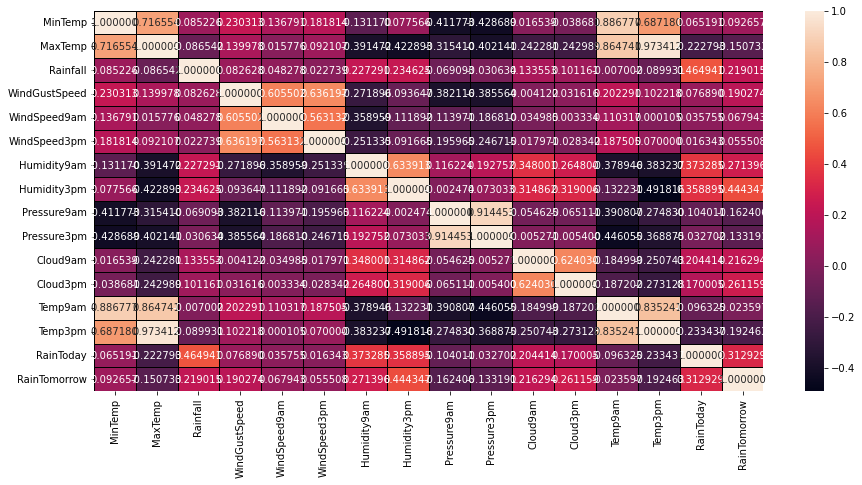

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

# Observation:

Rainfall,Humidity9am,Humidity3pm and RainTomorrow is very stringly correlated

Cloud9am,Cloud3pm are very positivily correlated

Pressure9am	,Pressure3pm are very weakly correlated

WindSpeed9am, WindSpeed3pm are also weakly correlated

In [132]:
df.describe()

MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  8425.000000  8425.000000  8425.000000    8425.000000   8425.000000   
mean     13.182682    23.825365     2.725982      40.036320     13.803917   
std       5.380656     6.128159    10.319872      13.781296     10.138945   
min      -2.000000     8.200000     0.000000       7.000000      0.000000   
25%       9.300000    19.200000     0.000000      31.000000      6.000000   
50%      13.200000    23.200000     0.000000      39.000000     13.000000   
75%      17.300000    28.000000     0.800000      48.000000     20.000000   
max      28.500000    45.500000   371.000000     107.000000     63.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean      18.412582    67.858754    51.295193  1017.198944  1015.635347   
std        9.763307    16.779787    18.316487     6.359552     6.286580   
min        0.000000    10.000000     6.000000   989.800000   982.900000   
25%       11.000000    56.000000    39.000000  1014.000000  1011.400000   
50%       19.000000    68.000000    51.000000  1016.100000  1017.000000   
75%       24.000000    80.000000    63.000000  1021.300000  1018.800000   
max       83.000000   100.000000    99.000000  1039.000000  1036.000000   

          Cloud9am     Cloud3pm      Temp9am      Temp3pm    RainToday  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean      5.265875     5.230742    17.742326    22.405982     0.236202   
std       2.667166     2.564122     5.613463     5.955804     0.424773   
min       0.000000     0.000000     1.900000     7.300000     0.000000   
25%       3.000000     3.000000    13.800000    18.100000     0.000000   
50%       7.000000     7.000000    17.700000    21.800000     0.000000   
75%       7.000000     7.000000    21.900000    26.300000     0.000000   
max       8.000000     8.000000    39.400000    44.100000     1.000000   

       RainTomorrow  
count   8425.000000  
mean       0.236320  
std        0.424846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

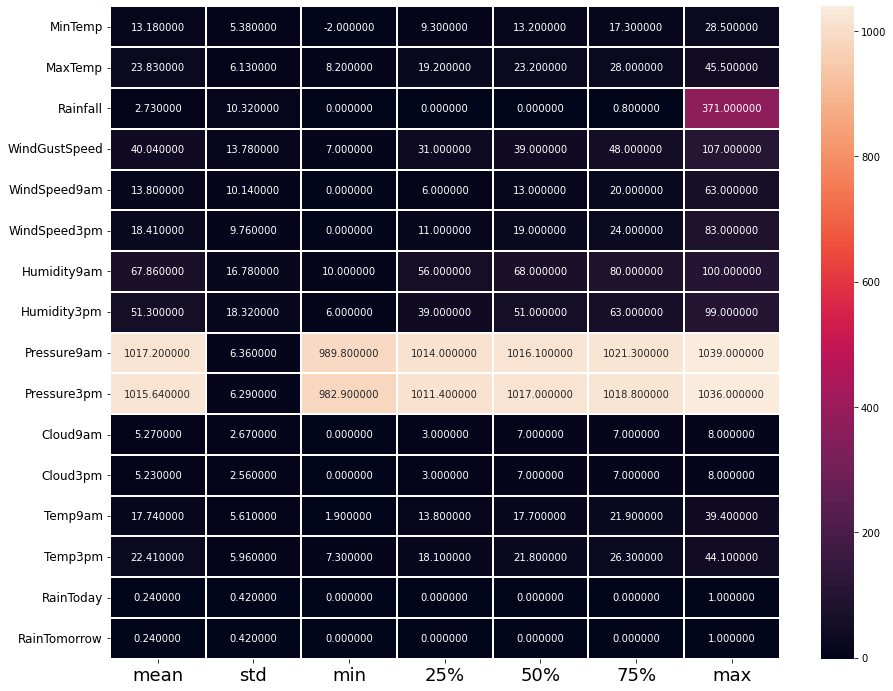

In [133]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

# Encoding of DataFrame

In [134]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [135]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [136]:
df

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0          1.0     13.4     22.9       0.6         13.0           44.0   
1          1.0      7.4     25.1       0.0         14.0           44.0   
2          1.0     12.9     25.7       0.0         15.0           46.0   
3          1.0      9.2     28.0       0.0          4.0           24.0   
4          1.0     17.5     32.3       1.0         13.0           41.0   
...        ...      ...      ...       ...          ...            ...   
8420       9.0      2.8     23.4       0.0          0.0           31.0   
8421       9.0      3.6     25.3       0.0          6.0           22.0   
8422       9.0      5.4     26.9       0.0          3.0           37.0   
8423       9.0      7.8     27.0       0.0          9.0           28.0   
8424       9.0     14.9     19.0       0.0          3.0           39.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           13.0        14.0          20.0          24.0         71.0   
1            6.0        15.0           4.0          22.0         44.0   
2           13.0        15.0          19.0          26.0         38.0   
3            9.0         0.0          11.0           9.0         45.0   
4            1.0         7.0           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420         9.0         1.0          13.0          11.0         51.0   
8421         9.0         3.0          13.0           9.0         56.0   
8422         9.0        14.0           9.0           9.0         53.0   
8423        10.0         3.0          13.0           7.0         51.0   
8424         2.0         2.0          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       7.0     16.9   
1            25.0       1010.6       1007.8       7.0       7.0     17.2   
2            30.0       1007.6       1008.7       7.0       2.0     21.0   
3            16.0       1017.6       1012.8       7.0       7.0     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3       7.0       7.0     10.1   
8421         21.0       1023.5       1019.1       7.0       7.0     10.9   
8422         24.0       1021.0       1016.8       7.0       7.0     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   
8424         36.0       1020.2       1017.9       8.0       8.0     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8          0             0  
1        24.3          0             0  
2        23.2          0             0  
3        26.5          0             0  
4        29.7          0             0  
...       ...        ...           ...  
8420     22.4          0             0  
8421     24.5          0             0  
8422     26.1          0             0  
8423     26.0          0             0  
8424     20.9          0             0  

[8425 rows x 20 columns]

In [137]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

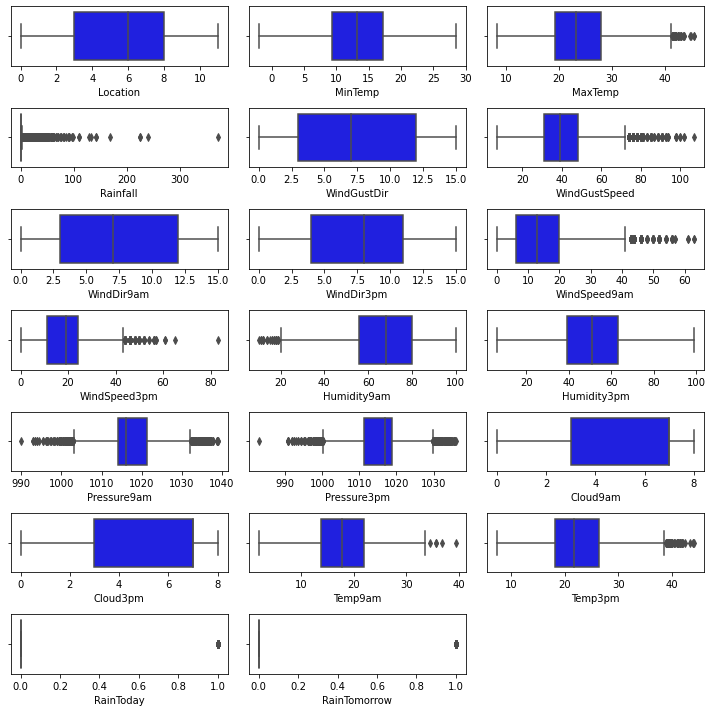

In [138]:
colist=df.columns.values
graph=1
plt.figure(figsize=(10,10))
for i in range(0, len(colist)):
    plt.subplot(7,3,graph)
    sns.boxplot(df[colist[i]],color='blue',orient='v')
    graph+=1
    plt.tight_layout()

In [139]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(8425, 20)

In [140]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  431,  462,  466,  563,  568,  568,  569,  683,
        683,  699,  713,  748,  770,  796,  797,  802,  928,  935,  949,
        979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151,
       1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413,
       1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
       1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063, 2074,
       2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429, 2488,
       2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2849, 2859,
       2890, 2898, 2900, 2901, 2909, 3003, 3051, 3051, 3058, 3059, 3059,
       3060, 3066, 3067, 3067, 3067, 3068, 3070, 3082, 3082, 3082, 3089,
       3089, 3099, 3099, 3141, 3153, 3167, 3172, 3212, 3212, 3234, 3248,
       3271, 3278, 3278, 3291, 3291, 3302, 3302, 3

In [141]:
len(np.where(z>3)[0])

454

In [142]:
z.iloc[12]

Location         1.515776
MinTemp          0.505046
MaxTemp          0.852732
Rainfall         1.247572
WindGustDir      1.229643
WindGustSpeed    1.521259
WindDir9am       0.276260
WindDir3pm       0.408688
WindSpeed9am     1.400237
WindSpeed3pm     0.982043
Humidity9am      0.485211
Humidity3pm      2.277035
Pressure9am      3.600930
Pressure3pm      3.600796
Cloud9am         1.025166
Cloud3pm         1.080067
Temp9am          0.060987
Temp3pm          1.109233
RainToday        1.798240
RainTomorrow     1.797649
Name: 12, dtype: float64

In [143]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0          1.0     13.4     22.9       0.6         13.0           44.0   
1          1.0      7.4     25.1       0.0         14.0           44.0   
2          1.0     12.9     25.7       0.0         15.0           46.0   
3          1.0      9.2     28.0       0.0          4.0           24.0   
4          1.0     17.5     32.3       1.0         13.0           41.0   
...        ...      ...      ...       ...          ...            ...   
8420       9.0      2.8     23.4       0.0          0.0           31.0   
8421       9.0      3.6     25.3       0.0          6.0           22.0   
8422       9.0      5.4     26.9       0.0          3.0           37.0   
8423       9.0      7.8     27.0       0.0          9.0           28.0   
8424       9.0     14.9     19.0       0.0          3.0           39.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           13.0        14.0          20.0          24.0         71.0   
1            6.0        15.0           4.0          22.0         44.0   
2           13.0        15.0          19.0          26.0         38.0   
3            9.0         0.0          11.0           9.0         45.0   
4            1.0         7.0           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420         9.0         1.0          13.0          11.0         51.0   
8421         9.0         3.0          13.0           9.0         56.0   
8422         9.0        14.0           9.0           9.0         53.0   
8423        10.0         3.0          13.0           7.0         51.0   
8424         2.0         2.0          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       7.0     16.9   
1            25.0       1010.6       1007.8       7.0       7.0     17.2   
2            30.0       1007.6       1008.7       7.0       2.0     21.0   
3            16.0       1017.6       1012.8       7.0       7.0     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3       7.0       7.0     10.1   
8421         21.0       1023.5       1019.1       7.0       7.0     10.9   
8422         24.0       1021.0       1016.8       7.0       7.0     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   
8424         36.0       1020.2       1017.9       8.0       8.0     15.0   

      Temp3pm  RainToday  RainTomorrow  
0        21.8          0             0  
1        24.3          0             0  
2        23.2          0             0  
3        26.5          0             0  
4        29.7          0             0  
...       ...        ...           ...  
8420     22.4          0             0  
8421     24.5          0             0  
8422     26.1          0             0  
8423     26.0          0             0  
8424     20.9          0             0  

[8062 rows x 20 columns]

In [144]:
df_new_z.shape

(8062, 20)

# Data Loss

In [145]:
(8425-8062)/8425*100

4.308605341246291

4.30% data are removed

# Separating the columns into feature and target

In [146]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [147]:
x

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
0          1.0     13.4     22.9       0.6         13.0           44.0   
1          1.0      7.4     25.1       0.0         14.0           44.0   
2          1.0     12.9     25.7       0.0         15.0           46.0   
3          1.0      9.2     28.0       0.0          4.0           24.0   
4          1.0     17.5     32.3       1.0         13.0           41.0   
...        ...      ...      ...       ...          ...            ...   
8420       9.0      2.8     23.4       0.0          0.0           31.0   
8421       9.0      3.6     25.3       0.0          6.0           22.0   
8422       9.0      5.4     26.9       0.0          3.0           37.0   
8423       9.0      7.8     27.0       0.0          9.0           28.0   
8424       9.0     14.9     19.0       0.0          3.0           39.0   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0           13.0        14.0          20.0          24.0         71.0   
1            6.0        15.0           4.0          22.0         44.0   
2           13.0        15.0          19.0          26.0         38.0   
3            9.0         0.0          11.0           9.0         45.0   
4            1.0         7.0           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420         9.0         1.0          13.0          11.0         51.0   
8421         9.0         3.0          13.0           9.0         56.0   
8422         9.0        14.0           9.0           9.0         53.0   
8423        10.0         3.0          13.0           7.0         51.0   
8424         2.0         2.0          17.0          17.0         62.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0            22.0       1007.7       1007.1       8.0       7.0     16.9   
1            25.0       1010.6       1007.8       7.0       7.0     17.2   
2            30.0       1007.6       1008.7       7.0       2.0     21.0   
3            16.0       1017.6       1012.8       7.0       7.0     18.1   
4            33.0       1010.8       1006.0       7.0       8.0     17.8   
...           ...          ...          ...       ...       ...      ...   
8420         24.0       1024.6       1020.3       7.0       7.0     10.1   
8421         21.0       1023.5       1019.1       7.0       7.0     10.9   
8422         24.0       1021.0       1016.8       7.0       7.0     12.5   
8423         24.0       1019.4       1016.5       3.0       2.0     15.1   
8424         36.0       1020.2       1017.9       8.0       8.0     15.0   

      Temp3pm  RainToday  
0        21.8          0  
1        24.3          0  
2        23.2          0  
3        26.5          0  
4        29.7          0  
...       ...        ...  
8420     22.4          0  
8421     24.5          0  
8422     26.1          0  
8423     26.0          0  
8424     20.9          0  

[8425 rows x 19 columns]

In [148]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8420    0
8421    0
8422    0
8423    0
8424    0
Name: RainTomorrow, Length: 8425, dtype: int32

In [149]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday'],
      dtype='object')

In [150]:
from sklearn.preprocessing import power_transform

In [151]:
x_new=power_transform(x)

In [152]:
type(x_new)

numpy.ndarray

In [153]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday'],
      dtype='object')

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [156]:
calc_vif()

        variables     VIF FACTOR
0        Location       4.998549
1         MinTemp      54.985039
2         MaxTemp     395.209670
3        Rainfall       1.398622
4     WindGustDir       5.402431
5   WindGustSpeed      21.133005
6      WindDir9am       4.638765
7      WindDir3pm       6.049931
8    WindSpeed9am       6.186969
9    WindSpeed3pm       9.025816
10    Humidity9am      66.914073
11    Humidity3pm      47.735200
12    Pressure9am  197534.291081
13    Pressure3pm  196565.814681
14       Cloud9am       9.174479
15       Cloud3pm       8.992689
16        Temp9am     185.886008
17        Temp3pm     476.678719
18      RainToday       2.050438


there are multicolleinearities are present 'MaxTemp','Pressure9am ','Pressure3pm','Temp3pm' with those columns

lets drop those columns

In [157]:
df=df.drop(["MaxTemp"],axis=1)

In [158]:
df=df.drop(["Pressure9am"],axis=1)

In [159]:
df=df.drop(["Pressure3pm"],axis=1)

In [160]:
df=df.drop(["Temp3pm"],axis=1)

In [161]:
df

Location  MinTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0          1.0     13.4       0.6         13.0           44.0        13.0   
1          1.0      7.4       0.0         14.0           44.0         6.0   
2          1.0     12.9       0.0         15.0           46.0        13.0   
3          1.0      9.2       0.0          4.0           24.0         9.0   
4          1.0     17.5       1.0         13.0           41.0         1.0   
...        ...      ...       ...          ...            ...         ...   
8420       9.0      2.8       0.0          0.0           31.0         9.0   
8421       9.0      3.6       0.0          6.0           22.0         9.0   
8422       9.0      5.4       0.0          3.0           37.0         9.0   
8423       9.0      7.8       0.0          9.0           28.0        10.0   
8424       9.0     14.9       0.0          3.0           39.0         2.0   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0           14.0          20.0          24.0         71.0         22.0   
1           15.0           4.0          22.0         44.0         25.0   
2           15.0          19.0          26.0         38.0         30.0   
3            0.0          11.0           9.0         45.0         16.0   
4            7.0           7.0          20.0         82.0         33.0   
...          ...           ...           ...          ...          ...   
8420         1.0          13.0          11.0         51.0         24.0   
8421         3.0          13.0           9.0         56.0         21.0   
8422        14.0           9.0           9.0         53.0         24.0   
8423         3.0          13.0           7.0         51.0         24.0   
8424         2.0          17.0          17.0         62.0         36.0   

      Cloud9am  Cloud3pm  Temp9am  RainToday  RainTomorrow  
0          8.0       7.0     16.9          0             0  
1          7.0       7.0     17.2          0             0  
2          7.0       2.0     21.0          0             0  
3          7.0       7.0     18.1          0             0  
4          7.0       8.0     17.8          0             0  
...        ...       ...      ...        ...           ...  
8420       7.0       7.0     10.1          0             0  
8421       7.0       7.0     10.9          0             0  
8422       7.0       7.0     12.5          0             0  
8423       3.0       2.0     15.1          0             0  
8424       8.0       8.0     15.0          0             0  

[8425 rows x 16 columns]

In [162]:
x=df.drop("RainTomorrow",axis=1)
y=df["RainTomorrow"]

In [163]:
x

Location  MinTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
0          1.0     13.4       0.6         13.0           44.0        13.0   
1          1.0      7.4       0.0         14.0           44.0         6.0   
2          1.0     12.9       0.0         15.0           46.0        13.0   
3          1.0      9.2       0.0          4.0           24.0         9.0   
4          1.0     17.5       1.0         13.0           41.0         1.0   
...        ...      ...       ...          ...            ...         ...   
8420       9.0      2.8       0.0          0.0           31.0         9.0   
8421       9.0      3.6       0.0          6.0           22.0         9.0   
8422       9.0      5.4       0.0          3.0           37.0         9.0   
8423       9.0      7.8       0.0          9.0           28.0        10.0   
8424       9.0     14.9       0.0          3.0           39.0         2.0   

      WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0           14.0          20.0          24.0         71.0         22.0   
1           15.0           4.0          22.0         44.0         25.0   
2           15.0          19.0          26.0         38.0         30.0   
3            0.0          11.0           9.0         45.0         16.0   
4            7.0           7.0          20.0         82.0         33.0   
...          ...           ...           ...          ...          ...   
8420         1.0          13.0          11.0         51.0         24.0   
8421         3.0          13.0           9.0         56.0         21.0   
8422        14.0           9.0           9.0         53.0         24.0   
8423         3.0          13.0           7.0         51.0         24.0   
8424         2.0          17.0          17.0         62.0         36.0   

      Cloud9am  Cloud3pm  Temp9am  RainToday  
0          8.0       7.0     16.9          0  
1          7.0       7.0     17.2          0  
2          7.0       2.0     21.0          0  
3          7.0       7.0     18.1          0  
4          7.0       8.0     17.8          0  
...        ...       ...      ...        ...  
8420       7.0       7.0     10.1          0  
8421       7.0       7.0     10.9          0  
8422       7.0       7.0     12.5          0  
8423       3.0       2.0     15.1          0  
8424       8.0       8.0     15.0          0  

[8425 rows x 15 columns]

# Skewness

In [164]:
sk=x.skew()
sk

Location         -0.050456
MinTemp          -0.084104
Rainfall         13.200523
WindGustDir       0.119640
WindGustSpeed     0.786153
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.969604
WindSpeed3pm      0.510765
Humidity9am      -0.262767
Humidity3pm       0.110858
Cloud9am         -0.863322
Cloud3pm         -0.804407
Temp9am          -0.005160
RainToday         1.242362
dtype: float64

In [165]:
sk[np.abs(sk)>0.5].all()

True

In [166]:
sk[np.abs(sk)>0.5].all()

True

In [167]:
x.skew()[np.abs(x.skew())<0.25].all()

True

In [168]:
x=power_transform(x,method='yeo-johnson')

In [169]:
x.skew()[np.abs(x.skew())<0.25].all()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

In [170]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.57286976,  0.04400111,  0.67703502, ...,  0.69338634,
        -0.1410323 , -0.55609919],
       [-1.57286976, -1.07383317, -0.65966688, ...,  0.69338634,
        -0.0876171 , -0.55609919],
       [-1.57286976, -0.04877632, -0.65966688, ..., -1.33349178,
         0.58495309, -0.55609919],
       ...,
       [ 1.00253169, -1.44924777, -0.65966688, ...,  0.69338634,
        -0.93077971, -0.55609919],
       [ 1.00253169, -0.9989538 , -0.65966688, ..., -1.33349178,
        -0.46261439, -0.55609919],
       [ 1.00253169,  0.32199884, -0.65966688, ...,  1.23430876,
        -0.48053745, -0.55609919]])

# Let's train the data

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [172]:
from sklearn.metrics import classification_report,confusion_matrix

In [173]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 4 The model is performing very wel
Traning accuracy score is= 4
Testing accuracy score is= 4
randam state= 6 The model is performing very wel
Traning accuracy score is= 6
Testing accuracy score is= 6
randam state= 12 The model is performing very wel
Traning accuracy score is= 12
Testing accuracy score is= 12
randam state= 71 The model is performing very wel
Traning accuracy score is= 71
Testing accuracy score is= 71
randam state= 166 The model is performing very wel
Traning accuracy score is= 166
Testing accuracy score is= 166
randam state= 174 The model is performing very wel
Traning accuracy score is= 174
Testing accuracy score is= 174
randam state= 235 The model is performing very wel
Traning accuracy score is= 235
Testing accuracy score is= 235
randam state= 251 The model is performing very wel
Traning accuracy score is= 251
Testing accuracy score is= 251
randam state= 254 The model is performing very wel
Traning accuracy score is= 254
Testing accuracy score is= 254
r

In [174]:
print(classification_report(y_test,pred_test))
print(accuracy_score(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1322
           1       0.65      0.44      0.52       363

    accuracy                           0.83      1685
   macro avg       0.75      0.69      0.71      1685
weighted avg       0.81      0.83      0.81      1685

0.827299703264095


Here accuracy_score is 82

In [175]:
print(confusion_matrix(y_test,pred_test))

[[1236   86]
 [ 205  158]]


here true positive and true nagetive rate is 1236 and 158

# RandomForestClassifier

In [176]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 90.80118694362018
[[1285   37]
 [ 118  245]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1322
           1       0.87      0.67      0.76       363

    accuracy                           0.91      1685
   macro avg       0.89      0.82      0.85      1685
weighted avg       0.91      0.91      0.90      1685



Here accuracy_score is 90 and here true positive and true nagetive rate is 1236 and 158

# SVC

In [177]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 84.56973293768546
[[1264   58]
 [ 202  161]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1322
           1       0.74      0.44      0.55       363

    accuracy                           0.85      1685
   macro avg       0.80      0.70      0.73      1685
weighted avg       0.83      0.85      0.83      1685



Here accuracy_score is 84 and here true positive and true nagetive rate is 1264 and 161

# KNeighborsClassifier

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
preknn=knn.predict(x_test)
print(accuracy_score(y_test,preknn))
print(confusion_matrix(y_test,preknn))
print(classification_report(y_test,preknn))

0.8433234421364986
[[1233   89]
 [ 175  188]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1322
           1       0.68      0.52      0.59       363

    accuracy                           0.84      1685
   macro avg       0.78      0.73      0.75      1685
weighted avg       0.83      0.84      0.84      1685



Here accuracy_score is 84 and here true positive and true nagetive rate is 1233 and 188

# Let's check cv ...and see model is overfitted or not

In [178]:
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [179]:
scr=cross_val_score(rf,x,y,cv=5)
print("CV score for Random Forest Model:",scr.mean())

CV score for Random Forest Model: 0.8538872403560831


# SVC

In [180]:
scr1=cross_val_score(svc,x,y,cv=5)
print("CV score for SVC Model:",scr1.mean())

CV score for SVC Model: 0.8281305637982197


# Logistic

In [181]:
scr2=cross_val_score(lr,x,y,cv=5)
print("CV score for Logistic Model:",scr2.mean())

CV score for Logistic Model: 0.8199406528189911


# KNeighborsClassifier

In [187]:
scr3=cross_val_score(knn,x,y,cv=5)
print("CV score for KNN Model:",scr3.mean())

CV score for KNN Model: 0.8003560830860534


Cv for RandomForestClassifier

In [182]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.8199406528189911 
The accuracy score is:- [0.85281899 0.85519288 0.89317507 0.81305638 0.85519288]


CV for SVC

In [183]:
lsscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.8281305637982197 
The accuracy score is:- [0.85281899 0.85519288 0.89317507 0.81305638 0.85519288]


CV for LR

In [184]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

The cv score is:- 0.8199406528189911 
The accuracy score is:- [0.85519288 0.7958457  0.78575668 0.81068249 0.85222552]


CV for Knn

In [188]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr3)

The cv score is:- 0.8199406528189911 
The accuracy score is:- [0.81008902 0.79881306 0.81008902 0.76973294 0.81305638]


# HYPERMETER TUNNING

In [190]:
RandomForestClassifier()

RandomForestClassifier()

In [191]:
from sklearn.model_selection import GridSearchCV

In [192]:
parameters={"max_features":['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [193]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [194]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [195]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt')

In [196]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8629080118694362

# AUC ROC

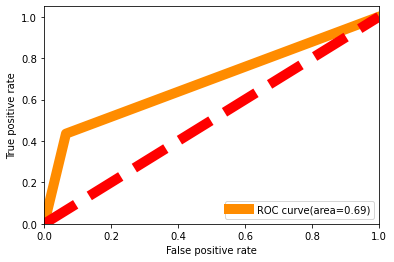

In [197]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,pred_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve(area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color='red',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')
plt.show()

In [198]:
import pickle
filename='weather.pkl'
pickle.dump(rf,open(filename,'wb'))

In [199]:
loaded_model=pickle.load(open('weather.pkl','rb'))
results=loaded_model.score(x_test,y_test)

In [200]:
results

0.9080118694362018

# Model is performaning 90% well

# conclusion

In [201]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=['Predicted','Orginal'])
conclusion

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted     0     0     0     1     0     0     1     0     0     0  ...   
Orginal       1     0     0     1     0     0     1     0     0     0  ...   

           1675  1676  1677  1678  1679  1680  1681  1682  1683  1684  
Predicted     1     1     0     0     0     0     0     0     1     0  
Orginal       0     0     0     0     0     0     0     0     0     0  

[2 rows x 1685 columns]

Now let's target  Rainfall column

# Separating the columns into feature and target¶

In [202]:
features=df.drop("Rainfall",axis=1)
target=df["Rainfall"]

# Sacling the data using MIN MAX Scaler:

In [203]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [204]:
import warnings
warnings.filterwarnings('ignore')

In [205]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")    
    

At random state0,the training accuracy is :- 0.2219784652128205
At random state0,the testing accuracy is :- 0.29560059014316364


At random state1,the training accuracy is :- 0.23539341957644688
At random state1,the testing accuracy is :- 0.22853018613884235


At random state2,the training accuracy is :- 0.25658468769948917
At random state2,the testing accuracy is :- 0.17802543628061362


At random state3,the training accuracy is :- 0.2384549508405338
At random state3,the testing accuracy is :- 0.21842125918574895


At random state4,the training accuracy is :- 0.2259893846529334
At random state4,the testing accuracy is :- 0.2878556736458522


At random state5,the training accuracy is :- 0.2311209889052972
At random state5,the testing accuracy is :- 0.2514713825206476


At random state6,the training accuracy is :- 0.22313827266758657
At random state6,the testing accuracy is :- 0.309377704180105


At random state7,the training accuracy is :- 0.22978594414406284
At random state7,the testi

At random state68,the testing accuracy is :- 0.2369134673786053


At random state69,the training accuracy is :- 0.23332518461909169
At random state69,the testing accuracy is :- 0.23962685398536931


At random state70,the training accuracy is :- 0.23227911811210145
At random state70,the testing accuracy is :- 0.24458041329363744


At random state71,the training accuracy is :- 0.2224342087359279
At random state71,the testing accuracy is :- 0.29669876264747264


At random state72,the training accuracy is :- 0.2258530178647501
At random state72,the testing accuracy is :- 0.28686613499634095


At random state73,the training accuracy is :- 0.2614283277680858
At random state73,the testing accuracy is :- 0.16726308023372327


At random state74,the training accuracy is :- 0.24305178157465956
At random state74,the testing accuracy is :- 0.20909854734484146


At random state75,the training accuracy is :- 0.23475479151153833
At random state75,the testing accuracy is :- 0.23163756818379577


At ran

In [206]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [207]:
lr.fit(features_train,target_train)

LinearRegression()

In [208]:
pred_test=lr.predict(features_test)

In [209]:
print(r2_score(target_test,pred_test))

0.3338288216151786


We have seen model is overfitted

# CV of the model

In [210]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cross score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing{Test_accuracy}")
    print("\n")

at cross fold2 the cross score is 0.2184158488035738 and accuracy score for training is -0.2592458807088931 and accuracy score for testing0.3338288216151786


at cross fold3 the cross score is 0.24382981953496366 and accuracy score for training is -0.2592458807088931 and accuracy score for testing0.3338288216151786


at cross fold4 the cross score is 0.23564783586667162 and accuracy score for training is -0.2592458807088931 and accuracy score for testing0.3338288216151786


at cross fold5 the cross score is 0.24747101738007338 and accuracy score for training is -0.2592458807088931 and accuracy score for testing0.3338288216151786


at cross fold6 the cross score is 0.25136663423841094 and accuracy score for training is -0.2592458807088931 and accuracy score for testing0.3338288216151786


at cross fold7 the cross score is 0.24062862186850006 and accuracy score for training is -0.2592458807088931 and accuracy score for testing0.3338288216151786


at cross fold8 the cross score is 0.26229

# Hyperparameter tuning

In [211]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [212]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,10],'random_state':list(range(0,10))}

In [213]:
ls=Lasso()
clif=GridSearchCV(ls,parameters)
clif.fit(features_train,target_train)
print(clif.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [214]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.23233701636515358

In [215]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.17092878255008964

# Esamble technique¶

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [217]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
parameters={'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]}
rf=RandomForestRegressor
clf=GridSearchCV(estimator, parameters, n_jobs=-1, cv=5)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 400, 'random_state': 18}


In [218]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print("R2 score:",rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("Cross_val_score:",rfc*100)

R2 score: 53.25221454315518
Cross_val_score: 37.045591023267725


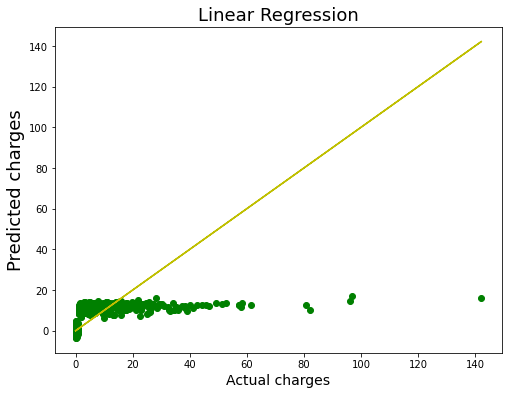

In [219]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='g')
plt.plot(target_test,target_test,color='y')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Model saving

In [220]:
import pickle
filename='Weather 2.pkl'
pickle.dump(rf,open(filename,'wb'))

In [222]:
loaded_model=pickle.load(open('Weather 2.pkl','rb'))
results=loaded_model.score(features_test,target_test)

In [223]:
results

0.5325221454315519

# conclusion

In [224]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Orginal'])

In [225]:
conclusion

0       1      2       3     4      5      6      7      8     \
Predicted   0.0  10.915  7.627  10.486  0.05  0.271  5.652  0.054  0.176   
Orginal     0.0  10.915  7.627  10.486  0.05  0.271  5.652  0.054  0.176   

            9     ...  1675   1676    1677   1678  1679  1680   1681   1682  \
Predicted  3.225  ...  0.01  0.056  11.482  0.026  0.01   0.0  11.08  0.024   
Orginal    3.225  ...  0.01  0.056  11.482  0.026  0.01   0.0  11.08  0.024   

           1683   1684  
Predicted  0.01  0.038  
Orginal    0.01  0.038  

[2 rows x 1685 columns]